## MELBOURNE HOUSING PRICES

In [56]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

###  1.0. Importing and Exploring Data

In [2]:
housing = pd.read_csv('C:/Users/ushai/Dropbox/Data Science/Datasets/melbourne-housing-market/Melbourne_housing_FULL.csv')

In [3]:
housing.shape

(34857, 21)

In [4]:
housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

###  1.1. Identifying null values 

In [6]:
# Identifying null values
housing.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [7]:
# Percentage of null values
housing.isnull().sum()/ len(housing)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.832057
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bedroom2         23.573457
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.576068
YearBuilt        55.386293
CouncilArea       0.008607
Lattitude        22.882061
Longtitude       22.882061
Regionname        0.008607
Propertycount     0.008607
dtype: float64

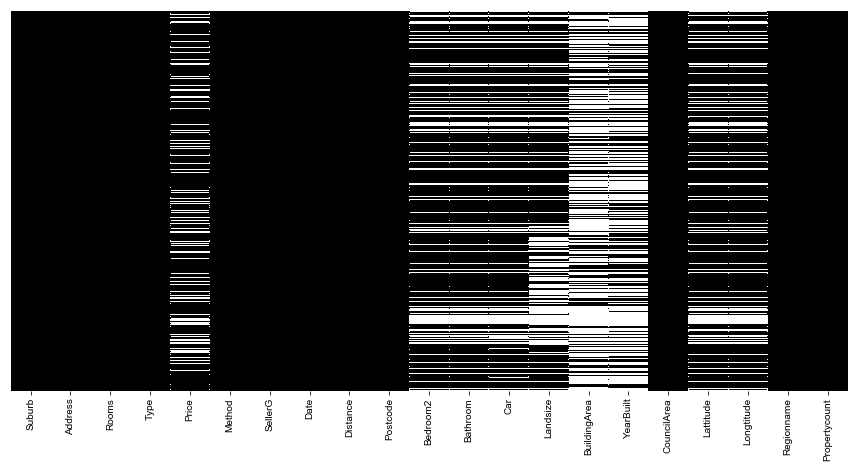

In [8]:
# Visualize missing values
plt.subplots(figsize=(15,7))
sns.set(font_scale=1)
sns.heatmap(housing.isnull(),yticklabels = False, cbar = False, cmap = 'Greys_r', label='')
plt.show()

In [9]:
# Dropping all null values
housing = housing.dropna()

In [10]:
housing.shape

(8887, 21)

###  1.2. Identifying Data Types 

In [11]:
# Removing full stop from the 'Postcode' column
housing['Postcode'] = housing['Postcode'].astype(str)
housing['Postcode'] = housing['Postcode'].str.replace('.', '')

# Changing back the 'Postcode' column back to object
housing['Postcode'] = housing['Postcode'].astype('object')

In [12]:
# Getting a list of all the objects
categorical = housing.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print((i))
    print(column.nunique())

Suburb
315
Address
8764
Type
3
Method
5
SellerG
250
Date
77
Postcode
194
CouncilArea
33
Regionname
8


In [13]:
# Drop columns with many unique variables to creat dummy variables
housing.drop(['Address','SellerG'], 1, inplace=True)

###  1.3. Abbreviating region names 

In [14]:
housing.Regionname.value_counts()

Southern Metropolitan         2707
Northern Metropolitan         2612
Western Metropolitan          2059
Eastern Metropolitan           982
South-Eastern Metropolitan     371
Northern Victoria               62
Eastern Victoria                51
Western Victoria                43
Name: Regionname, dtype: int64

In [15]:
# Abbreviate Regionname categories
housing['Regionname'] = housing['Regionname'].map({'Northern Metropolitan':'N Metro',
                                            'Western Metropolitan':'W Metro', 
                                            'Southern Metropolitan':'S Metro', 
                                            'Eastern Metropolitan':'E Metro', 
                                            'South-Eastern Metropolitan':'SE Metro', 
                                            'Northern Victoria':'N Vic',
                                            'Eastern Victoria':'E Vic',
                                            'Western Victoria':'W Vic'})

###  1.4. Data Exploration 

In [16]:
housing.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,8887.000000,8.887000e+03,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000
mean,3.098909,1.092902e+06,11.199887,3.078204,1.646450,1.692247,523.480365,149.309477,1965.753348,-37.804501,144.991393,7475.940137
std,0.963786,6.793819e+05,6.813402,0.966269,0.721611,0.975464,1061.324228,87.925580,37.040876,0.090549,0.118919,4375.024364
min,1.000000,1.310000e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.174360,144.423790,249.000000
25%,2.000000,6.410000e+05,6.400000,2.000000,1.000000,1.000000,212.000000,100.000000,1945.000000,-37.858560,144.920000,4382.500000
50%,3.000000,9.000000e+05,10.200000,3.000000,2.000000,2.000000,478.000000,132.000000,1970.000000,-37.798700,144.998500,6567.000000
75%,4.000000,1.345000e+06,13.900000,4.000000,2.000000,2.000000,652.000000,180.000000,2000.000000,-37.748945,145.064560,10331.000000
max,12.000000,9.000000e+06,47.400000,12.000000,9.000000,10.000000,42800.000000,3112.000000,2019.000000,-37.407200,145.526350,21650.000000


###  1.5. Visualizing Correlation 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020139BBCF28>,
      dtype=object)

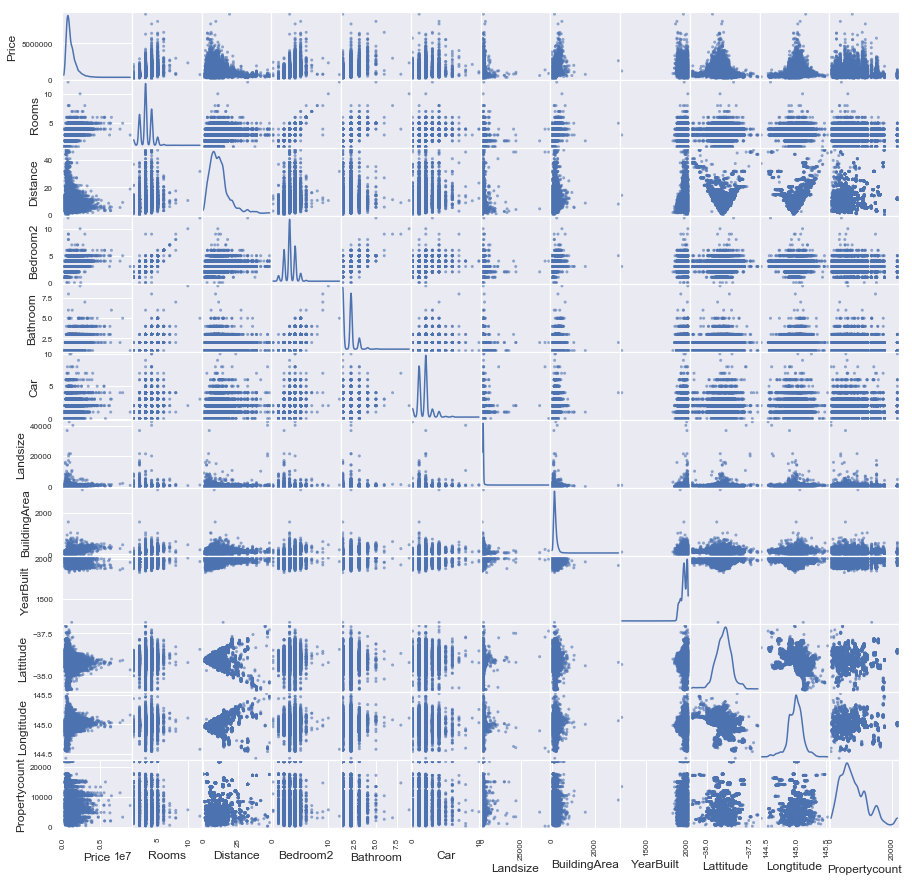

In [17]:
# creating a 'scatter matrix'
pd.scatter_matrix(housing[['Price',
 'Rooms',
 'Distance',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Propertycount']],alpha=0.6, figsize=(15,15), diagonal='kde')

###  1.6. Histogram Visualizations 

In [18]:
list(housing.select_dtypes('float'))

['Price',
 'Distance',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Propertycount']

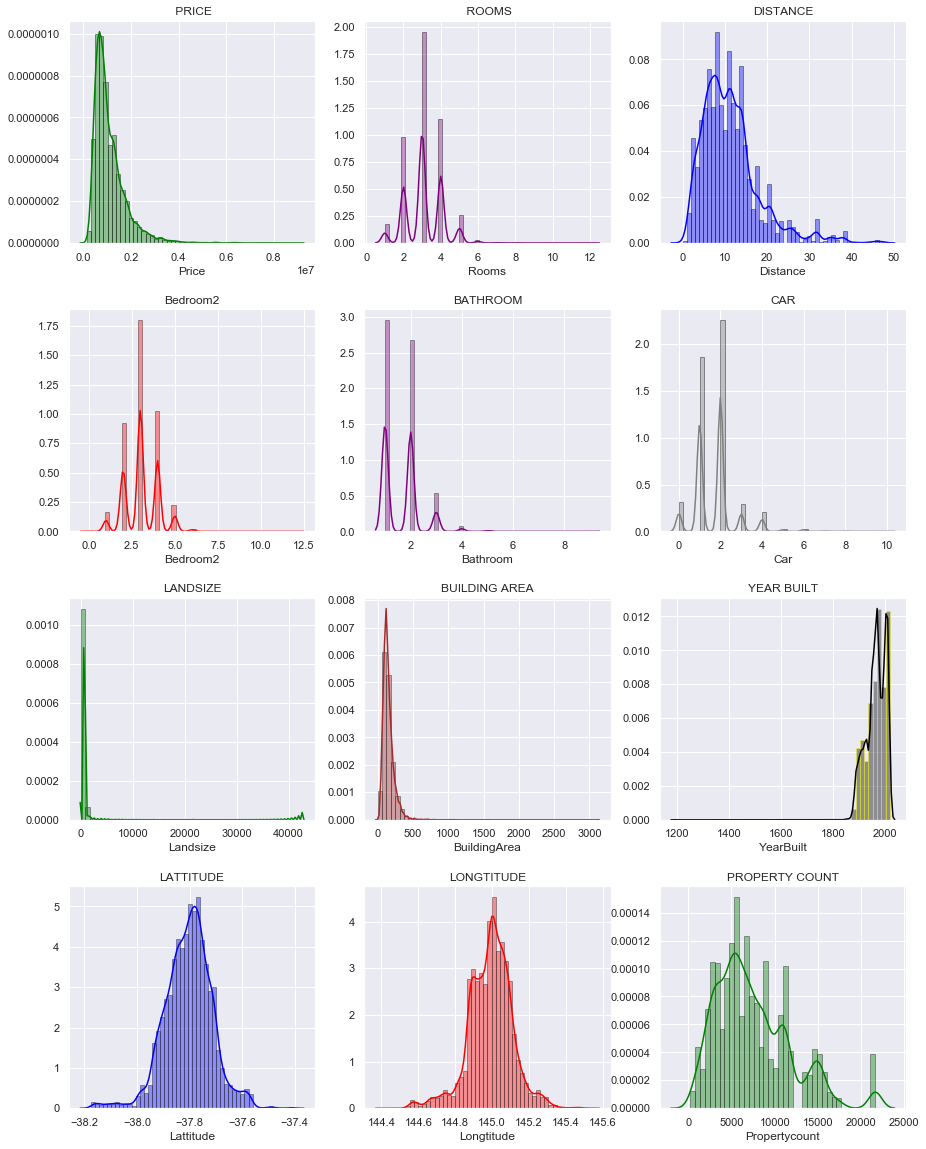

In [19]:
plt.figure(figsize=(15,20))

plt.subplot(4,3,1)
sns.distplot(housing['Price'], kde = True, hist_kws=dict(edgecolor="black"), color='green')
plt.title(' PRICE')

plt.subplot(4,3,2)
sns.distplot(housing['Rooms'], kde = True, hist_kws=dict(edgecolor="black"), color='purple')
plt.title(' ROOMS')

plt.subplot(4,3,3)
sns.distplot(housing['Distance'], kde = True, hist_kws=dict(edgecolor="black"), color='blue')
plt.title('DISTANCE')

plt.subplot(4,3,4)
sns.distplot(housing['Bedroom2'], kde = True, hist_kws=dict(edgecolor="k"), color='red')
plt.title('Bedroom2')

plt.subplot(4,3,5)
sns.distplot(housing['Bathroom'], kde = True, hist_kws=dict(edgecolor="k"), color='purple')
plt.title('BATHROOM')

plt.subplot(4,3,6)
sns.distplot(housing['Car'], kde = True, hist_kws=dict(edgecolor="black"), color='grey')
plt.title('CAR')

plt.subplot(4,3,7)
sns.distplot(housing['Landsize'], kde = True, hist_kws=dict(edgecolor="k"), color='green')
plt.title('LANDSIZE')

plt.subplot(4,3,8)
sns.distplot(housing['BuildingArea'], kde = True, hist_kws=dict(edgecolor="k"), color='brown')
plt.title('BUILDING AREA')

plt.subplot(4,3,9)
sns.distplot(housing['YearBuilt'], kde = True, hist_kws=dict(edgecolor="yellow"), color='black')
plt.title('YEAR BUILT')

plt.subplot(4,3,10)
sns.distplot(housing['Lattitude'], kde = True, hist_kws=dict(edgecolor="k"), color='blue')
plt.title('LATTITUDE')

plt.subplot(4,3,11)
sns.distplot(housing['Longtitude'], kde = True, hist_kws=dict(edgecolor="k"), color='red')
plt.title('LONGTITUDE')

plt.subplot(4,3,12)
sns.distplot(housing['Propertycount'], kde = True, hist_kws=dict(edgecolor="k"), color='green')
plt.title('PROPERTY COUNT')

plt.subplots_adjust(hspace=0.3)
plt.show()

### 1.7. Boxplot Visualizations 

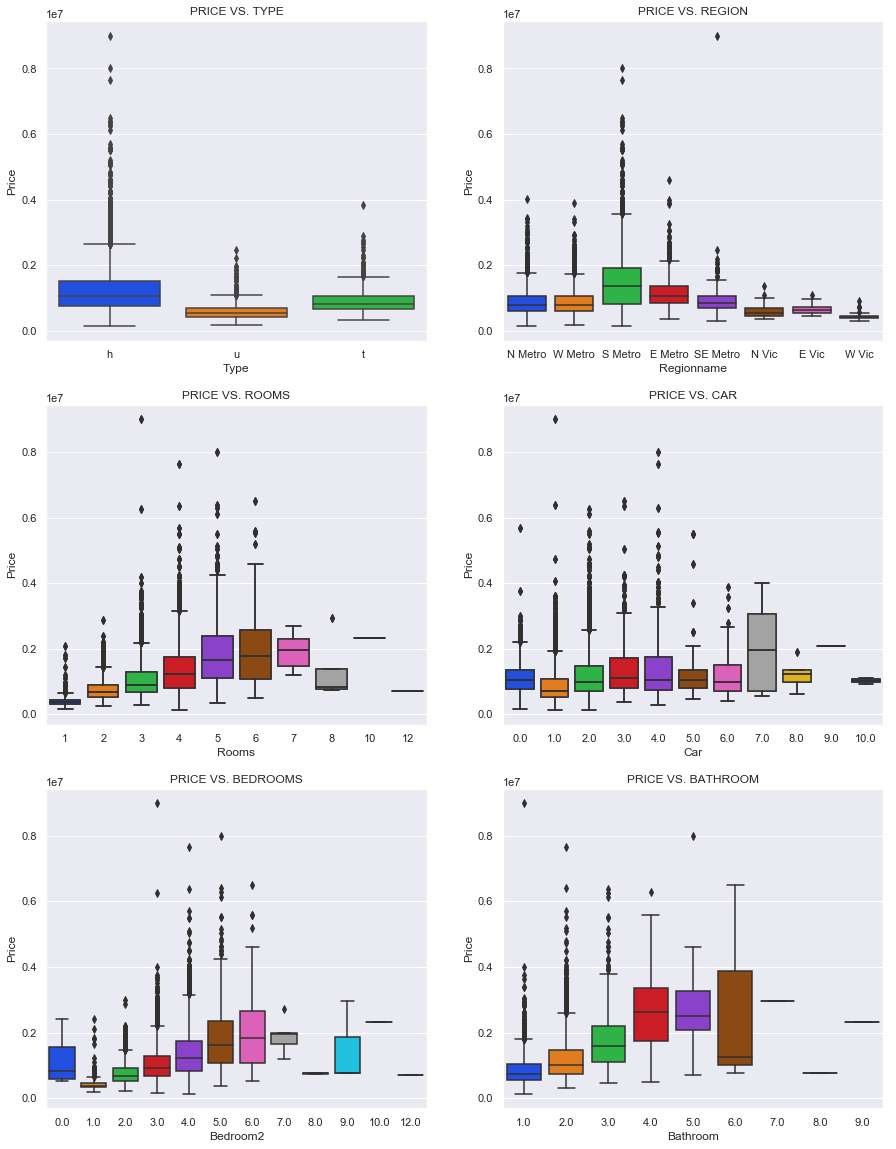

In [53]:
sns.set_style('darkgrid')

plt.figure(figsize=(15,20))

plt.subplot(3,2,1)
sns.boxplot(data=housing, x = 'Type', y='Price', palette='bright')
plt.title('PRICE VS. TYPE')

plt.subplot(3,2,2)
sns.boxplot(data=housing, x = 'Regionname', y='Price', palette='bright')
plt.title('PRICE VS. REGION')


plt.subplot(3,2,3)
sns.boxplot(data=housing, x = 'Rooms', y='Price', palette='bright')
plt.title('PRICE VS. ROOMS')

plt.subplot(3,2,4)
sns.boxplot(data=housing, x = 'Car', y='Price', palette='bright')
plt.title('PRICE VS. CAR')

plt.subplot(3,2,3)
sns.boxplot(data=housing, x = 'Rooms', y='Price', palette='bright')
plt.title('PRICE VS. ROOMS')

plt.subplot(3,2,4)
sns.boxplot(data=housing, x = 'Car', y='Price', palette='bright')
plt.title('PRICE VS. CAR')

plt.subplot(3,2,5)
sns.boxplot(data=housing, x = 'Bedroom2', y='Price', palette='bright')
plt.title('PRICE VS. BEDROOMS')

plt.subplot(3,2,6)
sns.boxplot(data=housing, x = 'Bathroom', y='Price', palette='bright')
plt.title('PRICE VS. BATHROOM')

plt.show()

###  2.0. Creating Dummy Variables 

In [21]:
list(housing.select_dtypes('object'))

['Suburb', 'Type', 'Method', 'Date', 'Postcode', 'CouncilArea', 'Regionname']

In [22]:
# Getting a list of all the objects
categorical = housing.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

Suburb
315
Type
3
Method
5
Date
77
Postcode
194
CouncilArea
33
Regionname
8


In [23]:
X = pd.get_dummies(housing.drop('Price', 1))
y = housing['Price']

In [24]:
X.head()

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,...,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_E Metro,Regionname_E Vic,Regionname_N Metro,Regionname_N Vic,Regionname_S Metro,Regionname_SE Metro,Regionname_W Metro,Regionname_W Vic
2,2,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,...,1,0,0,0,1,0,0,0,0,0
4,3,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,...,1,0,0,0,1,0,0,0,0,0
6,4,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,...,1,0,0,0,1,0,0,0,0,0
11,3,2.5,4.0,2.0,0.0,245.0,210.0,1910.0,-37.8024,144.9993,...,1,0,0,0,1,0,0,0,0,0
14,2,2.5,2.0,1.0,2.0,256.0,107.0,1890.0,-37.8060,144.9954,...,1,0,0,0,1,0,0,0,0,0


In [25]:
print(X.shape)
print(y.shape)

(8887, 646)
(8887,)


In [26]:
# List of columns
list(X.columns)

['Rooms',
 'Distance',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Propertycount',
 'Suburb_Abbotsford',
 'Suburb_Aberfeldie',
 'Suburb_Airport West',
 'Suburb_Albanvale',
 'Suburb_Albert Park',
 'Suburb_Albion',
 'Suburb_Alphington',
 'Suburb_Altona',
 'Suburb_Altona Meadows',
 'Suburb_Altona North',
 'Suburb_Ardeer',
 'Suburb_Armadale',
 'Suburb_Ascot Vale',
 'Suburb_Ashburton',
 'Suburb_Ashwood',
 'Suburb_Aspendale',
 'Suburb_Aspendale Gardens',
 'Suburb_Attwood',
 'Suburb_Avondale Heights',
 'Suburb_Bacchus Marsh',
 'Suburb_Balaclava',
 'Suburb_Balwyn',
 'Suburb_Balwyn North',
 'Suburb_Bayswater',
 'Suburb_Bayswater North',
 'Suburb_Beaconsfield',
 'Suburb_Beaconsfield Upper',
 'Suburb_Beaumaris',
 'Suburb_Bellfield',
 'Suburb_Bentleigh',
 'Suburb_Bentleigh East',
 'Suburb_Berwick',
 'Suburb_Black Rock',
 'Suburb_Blackburn',
 'Suburb_Blackburn North',
 'Suburb_Blackburn South',
 'Suburb_Bonbeach',
 'Suburb_Boronia',
 

###  2.1. Preprocessing 

In [27]:
# Feature Scaling
# from sklearn.preprocessing import StandardScaler

#sc = StandardScaler()  
#X_scaled = sc.fit_transform(X)

###  2.2. Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

###  3.0. Model 1: Multiple Linear Regression 

####  3.1. Importing and Fitting the Model 

In [29]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

print('\nR²:',linreg.score(X_train, y_train))


R²: 0.7439171651424673


In [30]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Mean squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 2627683148.985201
Mean squared Error: 6.651021717199678e+21
Root Mean Squared Error: 81553796460.98444


In [31]:
# Coefficent Values for linear regression
feature_importance = linreg.coef_

#### 3.2. Coefficent Estimates 

In [32]:
# Creating dataframe for Coefficients
coeff_linreg = pd.DataFrame(X.columns)
coeff_linreg['Coefficient Estimate'] = pd.Series(linreg.coef_)

# Renaming "single Column"
coeff_linreg = coeff_linreg.rename(columns = {0:'Variables'})

# sorting values by 'Coefficient Estimate'
coeff_linreg = coeff_linreg.sort_values(by=['Coefficient Estimate'],ascending=False).reset_index(drop=True)

In [33]:
coeff_linreg

,Variables,Coefficient Estimate
0,Type_h,9.946918e+13
1,Type_t,9.946918e+13
2,Type_u,9.946918e+13
3,Regionname_E Metro,2.628981e+13
4,Regionname_S Metro,2.562564e+13
5,Regionname_W Metro,2.004401e+13
6,Regionname_N Metro,1.920677e+13
7,Regionname_SE Metro,1.491543e+13
8,Regionname_E Vic,1.311380e+13
9,CouncilArea_Darebin City Council,1.153079e+13


####  3.3. Plotting Coefficent Values 

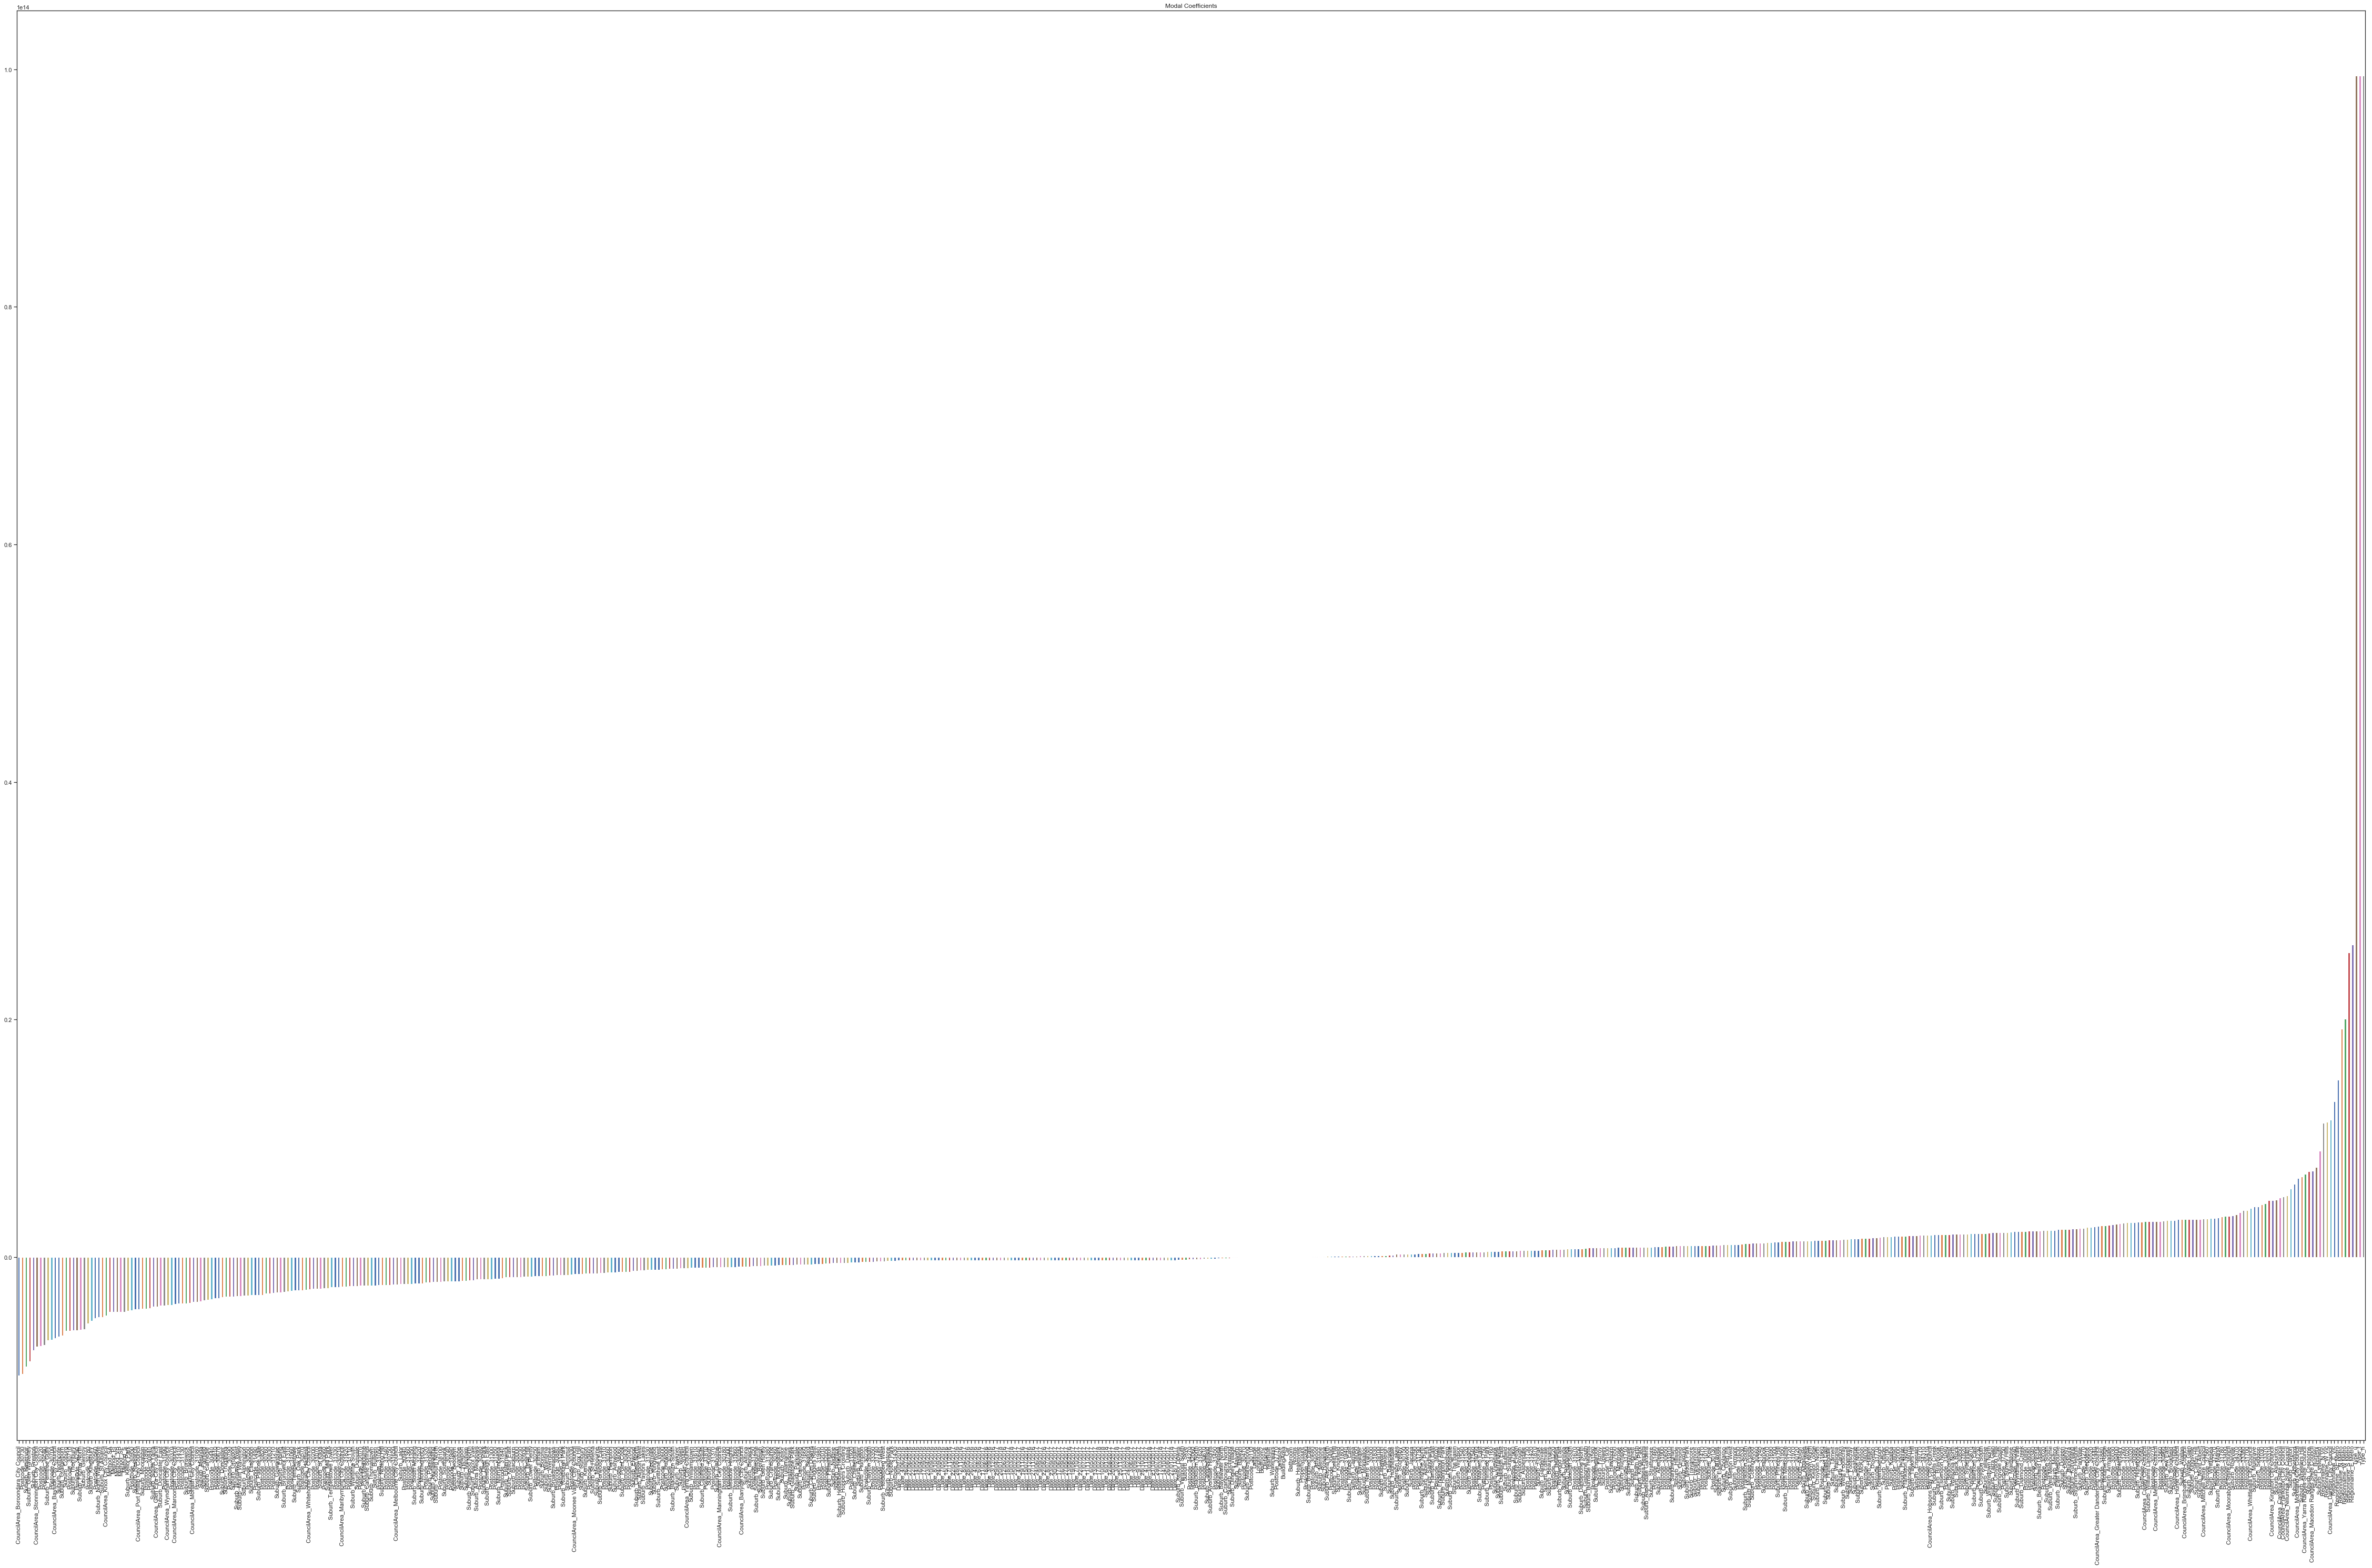

In [34]:
# checking the magnitude of coefficients
sns.set(style="ticks")
plt.figure(figsize=(80,50))
predictors = X.columns
coef = pd.Series(linreg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

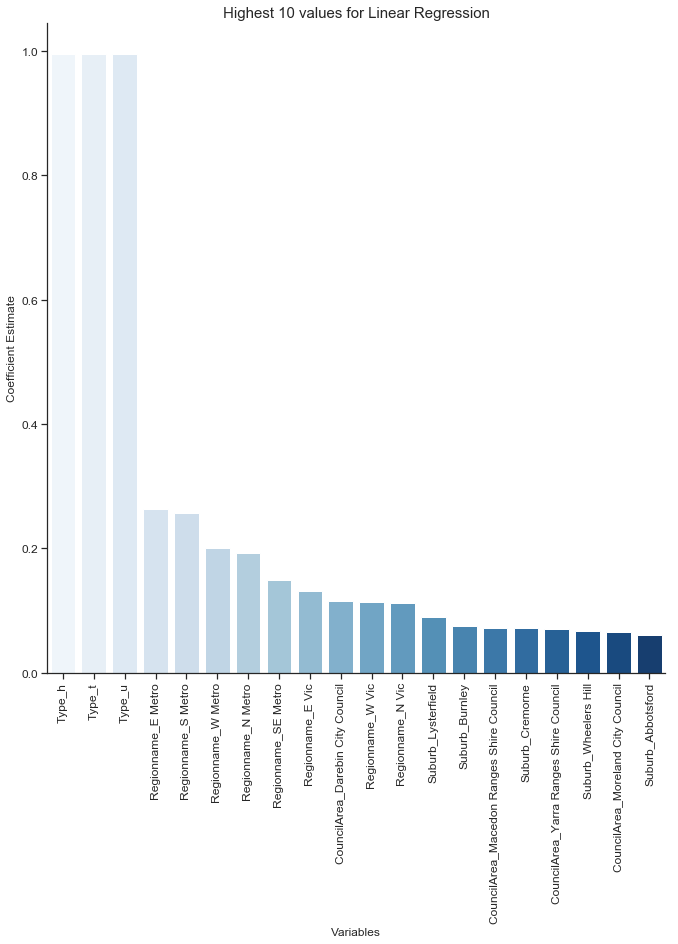

In [35]:
# Highest 10 values for Coefficents
highest = coeff_linreg.nlargest(20, 'Coefficient Estimate')

sns.set(style="ticks")

g = sns.catplot(x='Variables', y='Coefficient Estimate', data=highest,
                   height=10, kind="bar", palette="Blues", legend=False)
g.set_xlabels(fontsize=12)
g.set_ylabels(fontsize=12)
g.set_xticklabels(rotation=90, fontsize=12)
g.set_yticklabels(fontsize=12)
plt.title('Highest 10 values for Linear Regression',fontsize=15)
plt.show()

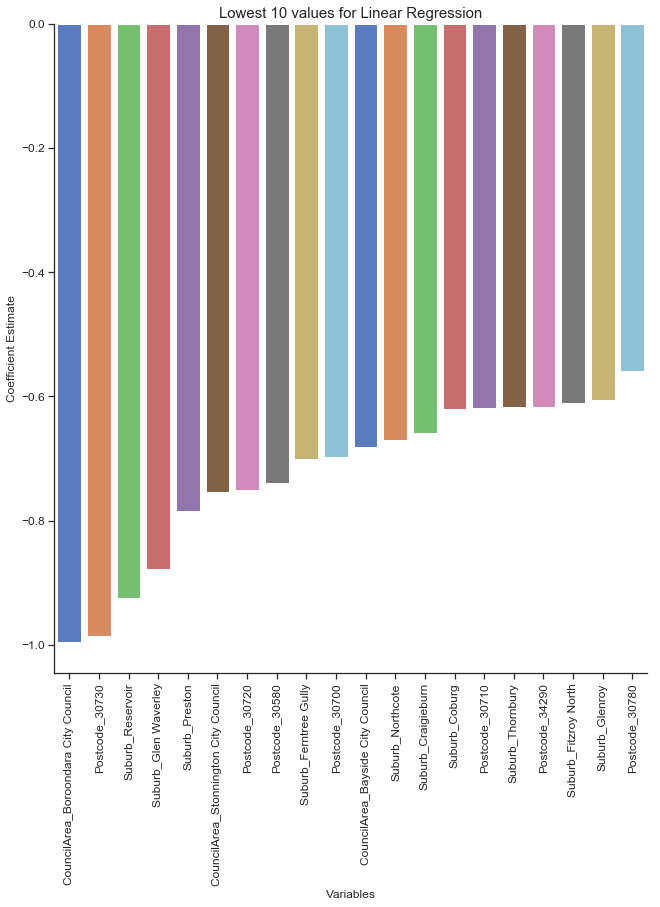

In [36]:
# Highest 10 values for Coefficents
highest = coeff_linreg.nsmallest(20, 'Coefficient Estimate')

sns.set(style="ticks")

g = sns.catplot(x='Variables', y='Coefficient Estimate', data=highest,
                   height=10, kind="bar", palette="muted", legend=False)
g.set_xlabels(fontsize=12)
g.set_ylabels(fontsize=12)
g.set_xticklabels(rotation=90, fontsize=12)
g.set_yticklabels(fontsize=12)
plt.title('Lowest 10 values for Linear Regression',fontsize=15)
plt.show()

###  4.0. Model 2: Ridge Regression 

#### 4.1. Importing and Fitting the Model 

In [37]:
from sklearn import linear_model
ridge = linear_model.Ridge()
ridge.fit(X_train, y_train)
print('\nR-squared:')
print(ridge.score(X_train, y_train))


R-squared:
0.7432126035852035


####  4.2. Coefficent Estimates 

In [38]:
# Creating dataframe for Coefficients
coeff_ridge = pd.DataFrame(X.columns)
coeff_ridge['Coefficient Estimate'] = pd.Series(ridge.coef_)
coeff_ridge = coeff_ridge.rename(columns = {0:'Variables'})
coeff_ridge = coeff_ridge.sort_values(by=['Coefficient Estimate'],ascending=False).reset_index(drop=True)
coeff_ridge.head()

,Variables,Coefficient Estimate
0,CouncilArea_Stonnington City Council,379626.354170
1,CouncilArea_Boroondara City Council,379125.443670
2,Suburb_Eaglemont,340212.017812
3,Postcode_32060,336284.005633
4,Suburb_Middle Park,332946.488189


###  5.0. Model 3: Lasso Regression 

####  5.1. Importing and Fitting the Model 

In [54]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=5.0, fit_intercept=True, normalize=False)
lasso.fit(X_train, y_train)
print('\nR-squared:')
print(lasso.score(X_train, y_train))


R-squared:
0.7438414000472029


####  5.2. Coefficent Estimates 

In [40]:
# Creating dataframe for Coefficients
coeff_lasso = pd.DataFrame(X.columns)
coeff_lasso['Coefficient Estimate'] = pd.Series(lasso.coef_)
coeff_lasso = coeff_lasso.rename(columns = {0:'Variables'})
coeff_lasso = coeff_lasso.sort_values(by=['Coefficient Estimate'],ascending=False).reset_index(drop=True)
coeff_lasso.head()

,Variables,Coefficient Estimate
0,Suburb_Emerald,650097.855345
1,Suburb_Canterbury,618232.026441
2,CouncilArea_Boroondara City Council,555601.242519
3,Suburb_Brighton,551280.478628
4,Postcode_31440,532206.820114


###  6.0. Model 4: Random Forest 

In [41]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
print('\nR²:', rf.score(X_train, y_train))


R²: 0.9659467246883042


####  6.1. Feature Importance 

In [42]:
feature_importance = rf.feature_importances_
feature_importance

array([1.29561223e-02, 7.28427554e-02, 7.24070063e-03, 1.27796396e-02,
       5.63473746e-03, 6.09349932e-02, 3.53698487e-01, 1.18898164e-01,
       4.11960461e-02, 4.68993775e-02, 1.01278968e-02, 1.37026813e-05,
       1.53882367e-04, 1.20113559e-05, 1.21128414e-07, 2.02213550e-03,
       2.65308279e-06, 2.25721259e-04, 1.38552645e-04, 1.02069190e-08,
       3.47962043e-05, 4.93742892e-08, 6.77531168e-05, 3.85739414e-05,
       6.32341539e-05, 5.69504967e-06, 1.20467954e-06, 3.94075260e-09,
       1.38508321e-06, 1.55142862e-05, 0.00000000e+00, 2.47964923e-07,
       1.14077607e-04, 6.31099237e-05, 1.97446024e-09, 3.99225942e-08,
       5.13858992e-08, 1.97698943e-08, 8.32898388e-05, 2.10219316e-06,
       3.94279605e-05, 8.65386473e-06, 6.46143406e-08, 5.84187219e-07,
       1.83853029e-05, 1.47654188e-05, 1.69446068e-05, 2.54401426e-06,
       1.12447489e-06, 2.85168313e-07, 2.82815583e-04, 7.70765878e-06,
       7.91280560e-08, 3.59336170e-04, 8.69436154e-05, 1.91744609e-06,
      

In [43]:
# Creating a list of feature names
feature_labels = X.columns
imp_feat_list = pd.DataFrame(feature_labels)
imp_feat_list = imp_feat_list.rename(columns = {0:'Variables'})
imp_feat_list['Feature Importance'] =pd.Series(feature_importance)
imp_feat_list = imp_feat_list.sort_values(by=['Feature Importance'],ascending=False).reset_index(drop=True)
imp_feat_list.head(20)

,Variables,Feature Importance
0,BuildingArea,0.353698
1,Regionname_S Metro,0.162884
2,YearBuilt,0.118898
3,Distance,0.072843
4,Landsize,0.060935
5,Longtitude,0.046899
6,Lattitude,0.041196
7,Rooms,0.012956
8,Bathroom,0.012780
9,Propertycount,0.010128


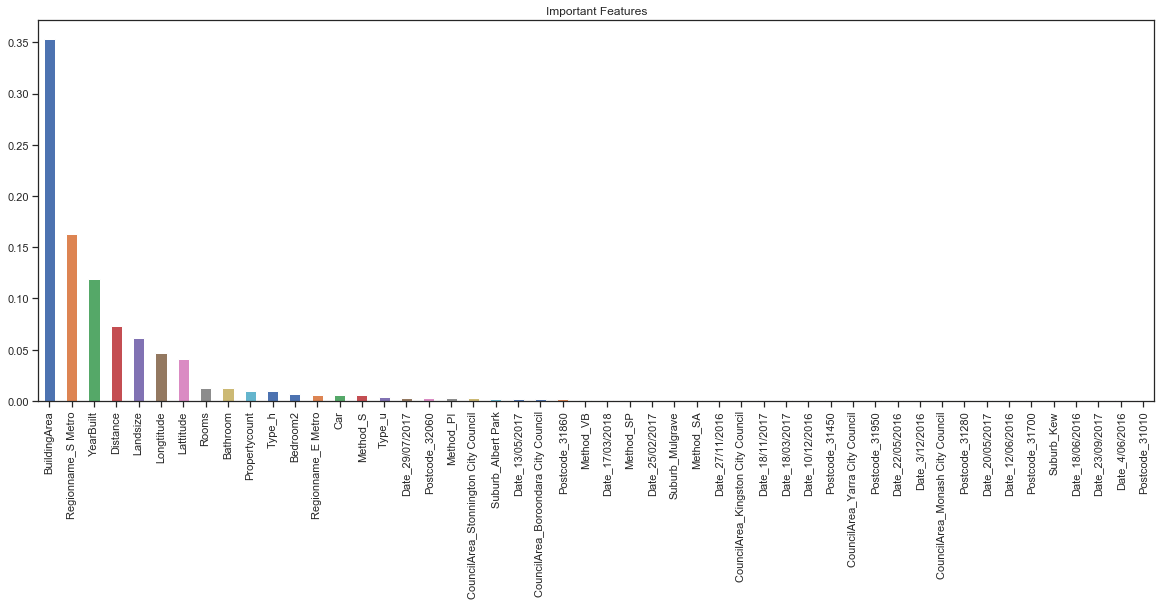

In [44]:
# Plotting important features
sns.set(style="ticks")
plt.figure(figsize=(20,7))
predictors = X.columns
coef = pd.Series(rf.feature_importances_,predictors).sort_values()
coef1 = coef.nlargest(n=50, keep='first')                                          
coef1.plot(kind='bar', title='Important Features')#invert_yaxis()

### <font color='orange'> 7.0. Running Models with new set of features obtained from Random Forest </font>

In [45]:
X_new = X[list(imp_feat_list['Variables'].head(20))]
y_new = housing['Price']

In [46]:
from sklearn.model_selection import train_test_split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=0)

#### <font color='darkblue'> 7.1. Linear Regression </font>

In [47]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train_new, y_train_new)

print('\nR²:',linreg.score(X_train_new, y_train_new))


R²: 0.6570673786062612


#### <font color='darkblue'> 7.2. Ridge Regression </font>

In [48]:
from sklearn import linear_model
ridge = linear_model.Ridge()
ridge.fit(X_train_new, y_train_new)
print('\nR-squared:')
print(ridge.score(X_train_new, y_train_new))


R-squared:
0.6570629205667644


#### <font color='darkblue'> 7.3. Ridge Regression </font>

In [49]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=5.0, fit_intercept=True, normalize=False)
lasso.fit(X_train_new, y_train_new)
print('\nR-squared:')
print(lasso.score(X_train_new, y_train_new))


R-squared:
0.6570673488154166


#### <font color='darkblue'> 7.3. Random Forest </font>

In [50]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train_new, y_train_new)
print('\nR²:', rf.score(X_train_new, y_train_new))


R²: 0.9638425246431586


In [51]:
# How to deal with following Error if no null values are removed